Author: Sean Tulin
<br>
Date: Jan. 10, 2022
<br>
PHYS 2030 W22

# <center><font color=#46769B>Lesson 1: Normal distributions</font></center>

## <font color=#46769B>Introduction:</font>
The first section of this course will deal with __Monte Carlo methods__. Monte Carlo methods are a tool that uses *random sampling* to compute quantities where analytic methods may be very complicated or impossible. (It is named after the famous casino in Monaco.) This is not a course on probabilities and statistics. However, we will borrow many concepts from these topics.

Our goals for this lesson are:
- Introduce the __probability distribution function__ (PDF).
- Introduce __normal__ or __Gaussian distributions__, which are examples of PDFs that are used widely in the sciences and related fields.
- Learn some basics of using `numpy` and `matplotlib.pyplot`
- Learn how to sample from normal and uniform distributions using `numpy`

## <font color=#46769B>Probability distribution functions (PDFs)</font>

Suppose we want to measure a quantity $x$, the PDF is a function $P(x)$ that tells us how likely it is to obtain a given value of $x$. 

### <font color=#46769B>Discrete distributions</font>

For a *discrete* PDF, $x$ can take only certain discrete values. 
One example is flipping a coin: either we have heads ($x=1$), with probability $p$, or tails ($x=0$), with probability $1-p$, where $0 \le p \le 1$. (If it is a fair coin, then $p=0.5$.)
The PDF encodes the probability for each value of $x$:
$$P(x) = \left\{ \begin{array}{cc} p & {\rm for}\; x=1 \\ 1-p & {\rm for}\; x=0 \end{array} \right. \, .$$ 
This PDF is also known as *Bernoulli distribution*.

If we know the PDF, we can compute the mean value of $x$, denoted $\mu$, and the standard deviation of $x$, denoted $\sigma$.
For the coin flip, the mean value is
$$\mu = \sum_x P(x) \, x = p \times 1 + (1-p) \times 0 = p \, ,$$
which for a fair coin gives $\mu=0.5$ as expected.
To calculate the standard deviation, we first calculate the variance $\sigma^2$:
$$\sigma^2 = \sum_x P(x) \, (x - \mu)^2 
= p \times (1-p)^2 + (1-p)\times (0-p)^2 = p(1-p)\, . $$
The *standard deviation* is the square root of the variance<font color=red>$^1$</font>
$$\sigma = \sqrt{\sigma^2} = \sqrt{p(1-p)} \, .$$
For a fair coin $\sigma = 0.5$, which makes sense since the typical values of $x=0$ or $x=1$ are all $0.5$ away from the mean value $\mu=0.5$.

### <font color=#46769B>Continuous distributions</font>

For a *continuous* PDF, $x$ can on a continuum of values.
We consider that $x$ can take any value over an infinite domain $-\infty < x < \infty$, but it is also possible that the domain is bounded in some way (e.g., $0 \le x \le \infty$ or $-1 \le x \le 1$).
Here $P(x)$ is the probability *density*. This means that $P(x) \, dx$ is the probability to measure $x$ between $x$ and $x + dx$. 
In other words, the probability that $a \le x \le b$ is given by an integral $\int_a^b P(x) \, dx$.

Now we can compute the mean and variance.
These are:
$$\mu = \int_{-\infty}^{\infty} dx \, P(x) \, x$$
$$\sigma^2 = \int_{-\infty}^{\infty} dx \, P(x) \, (x-\mu)^2\, .$$ 
As usual, the standard deviation is the square root of the variance: $\sigma = \sqrt{\sigma^2}$.

### <font color=#46769B>Requirements on PDFs</font>

PDFs have to satisfy some intuitive requirements:
- Probabilities cannot be negative quantities, so $P(x) \ge 0$ for any value of $x$.
- The total probability to measure *any* value of the $x$ must be unity, i.e., 100\%. For a discrete distribution
$$\sum_x P(x) = 1\, ,$$
or for a continuous distribution
$$\int_{-\infty}^{\infty} P(x) = 1 \, .$$


### <font color=#46769B>Footnotes:</font>
<font color=red>$^1$</font> Although $\sigma$ has a special meaning as the standard deviation, it is really the variance $\sigma^2$ that is the fundamental parameter. To calculate the standard deviation, you *always calculate the variance and take the square root*. You might try a direct calculation of $\sigma$ as
$$\sigma = \sum_x P(x) \, (x - \mu)$$
but this is __wrong__ and yields $\sigma = \mu - \mu = 0$.



## <font color=#46769B>Normal distributions</font>

A *normal* or *Gaussian distribution* of one variable is a continuous distribution described by the function
$$\mathcal{N}(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{- \frac{(x-\mu)^2}{2\sigma^2}} \, .$$
Appropriately, the parameters $\mu$ and $\sigma$ that appear here are the mean and standard deviation of this distribution. (We will prove this in a moment.) 
We will use $\mathcal{N}(x)$ instead of $P(x)$ to denote a normal PDF, and sometimes we will write $\mathcal{N}(\mu,\sigma)$ to denote *a normal distribution centered at $\mu$ with standard deviation $\sigma$*.

The shape of $\mathcal{N}$ is the familiar bell curve. Let's plot it. If you like, you can change $\mu,\sigma$ to see what effect this has on the shape.

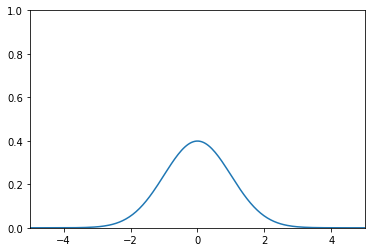

In [11]:
import numpy as np
import matplotlib.pyplot as plt

mu = 0
sigma = 1

x = np.linspace(-5,5,num=200)
N = 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-0.5*(x-mu)**2/sigma**2)

plt.plot(x,N)
plt.xlim([-5,5])
plt.ylim([0,1])
plt.show()

### <font color=#46769B>Gaussian integrals</font>

We will now prove three facts about $\mathcal{N}(x)$:
- That our Gaussian function is normalized to unity:
$$\int_{-\infty}^{\infty} dx \, \mathcal{N}(x) = 1 \qquad {\rm (1)} $$ 
- That the mean of our Gaussian function is $\mu$:
$$\int_{-\infty}^{\infty} dx \, x \, \mathcal{N}(x) = \mu \qquad {\rm (2)} $$
- That the standard deviation of our Gaussian function is $\sigma$:
$$\int_{-\infty}^{\infty} dx \, (x-\mu)^2 \, \mathcal{N}(x) = \sigma^2  \qquad {\rm (3)} $$

All three boil down to being able to perform various integrals of a Gaussian. This involves some mathematical ninja skills that you may not have seen before.

#### <font color=#46769B>The basic integral</font>

Let's calculate the integral $I = \int_{-\infty}^{\infty} dx \, e^{-x^2/2}$. The trick is to calculate $I^2$:
$$I^2 = \left( \int_{-\infty}^{\infty} dx \, e^{-x^2/2} \right) \times \left( \int_{-\infty}^{\infty} dy \, e^{-y^2/2} \right)$$
where in the second term the integration variable is labeled $y$ so we don't get confused with the first integration variable $x$. We can group the integrations together as
$$I^2 = \int_{-\infty}^{\infty} dx \int_{-\infty}^{\infty} dy \, e^{-\frac{x^2 + y^2}{2}}\, .$$
Now it looks like we are doing an integral over the 2D $x$-$y$ plane in Cartesian coordinates. Let's change to polar coordinates: $x = r \cos\theta$ and $y=r \sin\theta$, where $r = \sqrt{x^2 + y^2}$. We need to recall that the area element is
$$dx \, dy = r \, dr \, d\theta\, .$$
Now we have
$$I^2 = \int_0^\infty r \, dr \int_0^{2\pi} d\theta \, e^{-r^2/2} 
= 2\pi \, ,$$
where the $\theta$ integral gives (trivially) $\int_0^{2\pi} d\theta = 2\pi$ and the $r$ can be done with a substitution $u = \frac{1}{2}r^2$, which yields $\int_0^\infty dr \, r\, e^{-r^2/2} = \int_0^\infty du \, e^{-u} = 1$. Our final result is $I = \sqrt{2\pi}$.

#### <font color=#46769B>The general integral</font>

Let's calculate the integral $\int_{-\infty}^{\infty} dx \, e^{-\frac{(x-\mu)^2}{2\sigma^2}}$. If we define a new variable $u = (x-\mu)/\sigma$, then $dx = \sigma \, du$. The integral we want to calculate is now
$$\int_{-\infty}^{\infty} dx \, e^{-\frac{(x-\mu)^2}{2\sigma^2}} = \sigma \int_{-\infty}^{\infty} du \, e^{-\frac{u^2}{2}} = \sigma \sqrt{2\pi}\, ,$$
recognizing the integral $I$ as we had above (now an integral over $u$ instead of $x$).
Dividing by both sides by $\sqrt{2\pi\sigma^2}$ allows us to prove assertion (1).

Without much extra work, we can prove assertion (2). With the same $u$-substitution, we have
$$\int_{-\infty}^{\infty} dx \, x \, e^{-\frac{(x-\mu)^2}{2\sigma^2}} = \sigma \int_{-\infty}^{\infty} du \, (\mu + u \sigma) \, e^{-\frac{u^2}{2}} = \sigma \mu \int_{-\infty}^{\infty} du \, e^{-\frac{u^2}{2}} + \sigma^2 \int_{-\infty}^{\infty} du \, u \, e^{-\frac{u^2}{2}} = \sigma \mu \sqrt{2\pi}$$
The second integral vanishes since $u \, e^{-u^2/2}$ is an odd function integrated over an even domain, while the first term is just $I$. Dividing both sides by $\sqrt{2\pi \sigma^2}$ completes the proof.

#### <font color=#46769B>Differentiating under the integral</font>

Proving assertion (3) requires a new trick. We already proved the following result:
$$\int_{-\infty}^{\infty} dx \, e^{-\frac{(x-\mu)^2}{2\sigma^2}}  = \sqrt{2\pi} \sigma \, .$$
Now, we take the derivative of both sides *with respect to $\sigma$*, which is a trick known as differentiating under the integral:
$$\frac{d}{d \sigma} \left( \int_{-\infty}^{\infty} dx \, e^{-\frac{(x-\mu)^2}{2\sigma^2}}  \right) = \frac{d}{d \sigma} \left( \sqrt{2\pi} \sigma \right) \, .$$
This yields
$$\int_{-\infty}^{\infty} dx \, \frac{(x-\mu)^2}{\sigma^3} \, e^{-\frac{(x-\mu)^2}{2\sigma^2}}   =  \sqrt{2\pi} \, .$$
Multiplying through by $\sigma^2/\sqrt{2\pi}$ allows us to prove assertion (3).



## <font color=#46769B>Random sampling from a normal distribution</font>

It is easy to take samples from a normal distribution using `numpy`'s built-in (pseudo-)random number generator. (We won't discuss how such numbers are generated.) The syntax
```py
arr = numpy.random.normal(mu,sigma,num)
```
will create a `numpy.array` named `arr` of length `num` with randomly-generated entries. You can read more here: 

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

What does it mean to draw random samples from a distribution $P(x)$? If we make a histogram of our samples, it will approximate $P(x)$. We will use `matplotlib.pyplot.hist` to make histogram plots and you can read about this function here:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

One essential part of using `matplotlib.pyplot.hist` is setting a keyword argument `density=True` which will rescale the histogram to make the total area equal to unity, i.e., that the total probability is equal to one.

Let's see how this works. Below, you can explore how different inputs affect your results:
- Change the inputs `mu` and `sigma` to vary the location and width of the distribution
- Increase the size of your sample. Typically this should be *much* larger than the value `num=100` I chose.
- Increase the number of bins in the histgram from the value I chose, `bins=10`.

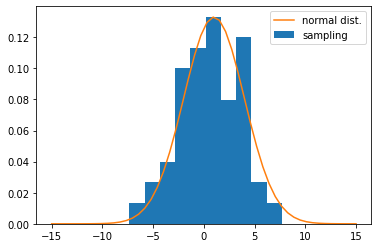

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define our parameters
mu = 1
sigma = 3
num = 100

# Draw our samples
arr = np.random.normal(mu,sigma,num)

# Plot a histogram
plt.hist(arr,bins=10,density=True,label='sampling')

# Now let's compare to our Gaussian PDF
x = np.linspace(-15,15)
y = 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-0.5*(x-mu)**2/sigma**2)
plt.plot(x,y,label='normal dist.')

plt.legend()
plt.show()

## <font color=#46769B>Monte Carlo samples and simulations</font>

Some terminology we will use:
- An *experiment* or *sample* is drawing one random value of $x$. The $i$th sample is denoted $x_i$.
- A *simulation* (or *Monte Carlo simulation*) is where we perform the experiment $N$ times, where $N$ is typically a large number. The simulation yields a list of samples $(x_0, x_1, x_2, ..., x_{N-1})$.<font color=red>$^2$</font>

The *mean* value of $x$ is
$$\langle x \rangle = \frac{1}{N} \sum_{i=0}^{N-1} x_i \, .$$
The variance of $x$ is<font color=red>$^3$</font>
$$\Delta x^2 = \frac{1}{N} \sum_{i=0}^{N-1} \left(x_i - \langle x \rangle \right)^2 \, ,$$
and so the standard deviation is
$$\Delta x = \sqrt{\Delta x^2} = \sqrt{ \frac{1}{N} \sum_{i=0}^{N-1} \left(x_i - \langle x \rangle \right)^2 } \, .$$

To clarify the notation, $\langle x \rangle$ and $\Delta x$ are the mean value and standard deviation of *our samples* for $x$, while $\mu$ and $\sigma$ are the *true* mean value and standard deviation of the PDF.
For fixed $N$, the values we compute for $\langle x \rangle$ and $\Delta x$ depend on luck of the draw (and will be different if we repeat the simulation multiple times) and are not generally equal to $\mu$ and $\sigma$, respectively. 
Intuitively, however, we expect that these will agree for large $N$:
$$\langle x \rangle \xrightarrow{N \to \infty} \mu \, , \qquad
\Delta x \xrightarrow{N \to \infty} \sigma \, .$$
We will return to this point in the next lecture, but for now let's take this at face value. Therefore, we always want to choose $N$ large enough so that $\langle x\rangle$ and $\Delta x$ converge to a fixed value (to the desired level of accuracy) 

`numpy` has built-in functions for calculating means and standard deviations:
```py
numpy.mean(x)
numpy.std(x)
```
Feel free to use these, or any other built-in `numpy` function where useful. (For simple tasks, it is always a good idea to check if there is already a `numpy` function before you reinvent the wheel.)

### <font color=#46769B>Footnotes:</font>

<font color=red>$^2$</font> Note since Python counting starts at zero, I will follow the same numbering conventions thoughout.

<font color=red>$^3$</font> In statistical analysis, it is sometimes advocated that the $\frac{1}{N}$ factor should be replaced with $\frac{1}{N-1}$. Since we are not studying statistics of fixed samples and are always free to take $N$ large, these subtleties are irrelevant for our purposes.

In [16]:
# Compute the mean and standard deviation from our samples

import numpy as np
import matplotlib.pyplot as plt

# Define our parameters
mu = 1
sigma = 3
num = 100

# Draw our samples
arr = np.random.normal(mu,sigma,num)

print('The mean of our samples is', np.mean(arr))
print('The standard deviation of our samples is', np.std(arr))

The mean of our samples is 1.4345113954316577
The standard deviation of our samples is 3.1423196682370675


Note you will get different results each time you run the above code, since different random numbers are being drawn each time. You want to choose $N$ large enough so that different simulations will yield identical results at the level of accuracy desired.

## <font color=#46769B>Related topics</font>

The `numpy.random` module includes many more routines. Here is a link to the documentation:

https://numpy.org/doc/stable/reference/random/index.html


### <font color=#46769B>Uniform sampling</font>

One important thing to know is how to generate a random number in the interval $[0,1]$, or more generally in the interval $[a,b]$. This is known as __uniform sampling__ since every value in the range is equally likely. 

Here is the syntax to generate a `numpy.array` with `num` random numbers between $[0,1]$:
```py
arr = numpy.random.rand(num)
```
We can generalize this to generate a `numpy.array` with `num` random numbers between $[a,b]$:
```py
arr = a + (b-a)*numpy.random.rand(num)
```

### <font color=#46769B>Uniform distribution</font>

"Pick a random number between $a$ and $b$" is known as a __uniform distribution__. The probability density must be a uniform constant in the range $a < x < b$ (i.e., all values are equally likely) and zero otherwise. Mathematically, this is
$$P(x) = \left\{ \begin{array}{cc} \frac{1}{b-a} & {\rm for} \; a < x < b \\ 0 & {\rm otherwise} \end{array} \right. \, .$$ 
The constant $1/(b-a)$ is determined by the fact that $\int_{-\infty}^{\infty} dx \, P(x) = 1$.

Let's draw random samples from a uniform distribution and compare them to the uniform distribution. Feel free to change the parameters and increase the number of samples `num`.

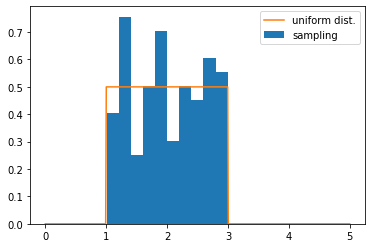

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define our parameters
# Note: assumes a < b
a = 1
b = 3
num = 100

# Draw our samples
arr = a + (b-a)*np.random.rand(num)

# Plot a histogram
plt.hist(arr,bins=10,density=True,label='sampling')

# Now let's compare to our uniform distribution PDF
x = np.linspace(0,5,num=500)

# Calculate the PDF

# First initialize y as an array of zeros of the same size as x
y = np.zeros_like(x)

# Next compute nonzero values using a for loop
for i in range(len(x)):
    
    if (x[i] >= a) and (x[i] <= b):
        y[i] = 1/(b-a)

plt.plot(x,y,label='uniform dist.')

plt.legend()
plt.show()